# FYS-STK4155 – Project 1: Regression analysis and resampling methods

##### Authors: Adele Zaini, Gaute Arnesson Holen, Fridtjof Gjengset
##### Date: 11. October, 2021

##### (Deadline extension) We had some last minute issues and bugs that took way longer to fix than anticipated initially. We were given an extended deadline until October 13th 23:59

### Note: we suggest to download the file to display it properly (i.e. images...)

## Before we start: 

After a general introduction and some theoretical background with elements shared and useful for each exercise, we move more deeply into the explanation and presentation of each task.

### General introduction

In this first project we were asked to explore the techniques of Regression, as the basic step to go further into Machine Learning, and the resampling methods, such as Bootstrap and Cross-validation, while perfoming a Bias-variance decomposition analysis.

In order to set up all our regression and resampling methods, we started working with a vanilla dataset given by the Franke function, depending of two independent variables $x$ and $y$, with an added stochastic noise. At the end, we performed the code with a real dataset taken from a terrain survey.

**Franke's function** is a weighted sum of four exponentials:

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function is defined for $x,y\in [0,1]$.

<right><img src="img/FrankeFunction.png" width="650"></right>

As concerning the noise, we generate datasets with different amounts of noise by changing the $\sigma$ value of its normal distribution $\epsilon \sim \cal{N}(0,\sigma^2)$. By comparing the plot of the Franke function with and without noise and looking at further results, $\sigma=[0.1,0.2]$ gives a reasonable amount of noise.

### Theoretical background

*Note: the explanation is given assuming a two-dimensional problem, in order to emphathise the physical idea and not to overwhelm the explanation of indexes little useful for the understanding. Just consider inputs $x$ as both indipendent variables $(x,y)$ and the outputs $y$ as the third dimension $z$. Relevant differences will be pointed out through notes.*

Given the two datasets of inputs $x=[x_0,x_1,...x_{n-1}]$ and the outputs $y=[y_0,y_1,...y_{n-1}]$, we perform a polynomial fit of this function using Regression methods with the following **basic assumption**. There exists a continuous function (some degree-order polynomial) $f(x)$ s.t. we can interpret the outputs as **$y(x)=f(x)+\epsilon$**. Basically we are splitting the outputs into a deterministic component, our model, and a stochastic error contribution $\epsilon$. Also, an importnant assumption is given by this error $\epsilon$ that we assume normally distributed with $\mu=0$ and variance $\sigma^2$ ($\epsilon \sim \cal{N}(0,\sigma^2)$).

So now assuming that the $f(x)$ can be approximated as a polynomial of $k$ degree, we get the following expression:

$$
y=y(x) \ \ \rightarrow \\ y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{k-1} \beta_j x_i^j+\epsilon_i, \\ \forall i=0,...n
$$

So that our model $\boldsymbol{\tilde{y}}$ (i.e. without the stochastic component) can be rewritten in a matricial notation:

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$
where $X$ is called *Design matrix* with $n$ rows and the number of columns depending on the degree of the polynomial. While $\beta$ is the estimator vector of the coefficients of our regression. 

*Note: in the three-dimensional problem, each row of the design matrix would look like $X_{i*}=[x_i, y_i,
x_i^2, y_i^2, x_iy_i, \dots]$. If the polynomial is of degree $k$ than our model will have $k'=\frac{(k+1)(k+2)}{2}$ ($k>0$) feutures, that means $k'$ columns of the design matrix and elements in $\beta$. The design matrix is then $(n \ \text{x} \ k')$.*

We need to find the optimal $\hat{\beta}$ that is the one that minimizes the cost function $C(X,\beta)$ (i.e. the "difference" between our data and the model we are choosing). In our own case, the $MSE$ is taken as cost function:
$$
C(X,\beta)=MSE(X,\beta)=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-X_{i*}\beta\right)^2
$$


The expression of the optimal $\hat{\beta}$ depends on the regression methods choosen. Here we explore the Linear (Ordinary Least Square, OLS), Ridge and Lasso Regression. For further details, see the introduction of the respective exercise.


### Code structure

The code is structured into libraries (e.g. `regression.py`), contained into the `regan` (Regression Analysis) package, which gather all the functions needed for solving the various tasks, while the specific task codes are in `task*.py` files.

In the course of this notebook, we inserted runnable cells to run the task codes directly and dynamically from here to show up the results, e.g.:

```
%run ./1project/task1.py
```


After a brief introduction, we will explain the algorithm, show the results and comment on them.

*Note: a further improvement to the code would be structuring as **object-oriented**. We have started converting the code but by the time of the deadline it was not ready to be runnable yet.*

## Exercise 1: Ordinary Least Square (OLS) on the Franke function

### Introduction
In this task we are asked to write our own code to perfom a standard least square regression analysis using polynomials in $x$ and $y$ up to fifth order. 

### <font color=purple>Ordinary Least Square Equation</font>
For the OLS Regression, the formula for the optimal $\hat{\beta}$ is the following (*Ordinary Least Square Equation*):

$$\hat{\beta}_{OLS} = (X^T X)^{-1}X^T z$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{OLS}$.

### <font color=purple>Error analysis</font>
To access the quality of the model, we perfom an error analysis, involving the Mean Square Error ($MSE$) and the $R^2$ score function:

$$
MSE(\hat{z},\hat{\tilde{z}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(z_i-\tilde{z}_i)^2,
$$

$$
R^2(\hat{z}, \tilde{\hat{z}}) = 1 - \frac{\sum_{i=0}^{n - 1} (z_i - \tilde{z}_i)^2}{\sum_{i=0}^{n - 1} (z_i - \bar{z})^2},
$$

where $\tilde{z}_i$ is the predicted value of the $i-th$ sample, $z_i$ is the corresponding true value and $\bar{z}$ is the mean value given by $ \bar{z} =  \frac{1}{n} \sum_{i=0}^{n - 1} z_i$.

### <font color=purple>Confidence interval</font>

The Confidence Interval gives a range of possible values for an unknown parameter, in own task that is the estimators $\beta$. This confidence interval is then associated with a cumulative probability, which indicates the probability that the random event described by the aleatory variable falls within this confidence interval. Graphically speaking, this is equal to the area subtended by the probability distribution curve of the aleatory variable in the interval considered. A confidence level of $95\%$ is commonly used and it is normally referred to as a *two-$\sigma$* confidence level.

<right><img src="img/ConfidenceInterval.png" width="500"></right>

Assuming that our estimators $\beta_i$ follow a normal distribution, we evaluate the confidence interval thanks to the following formula:

$$
CI=\left(\mu_{\beta_j}\pm \frac{z\sigma_{\beta_j}}{\sqrt{n}}\right),
$$

where $\mu_{\beta_j}$ is the unbiased value of $\beta_j$, $n$ is the number of datapoints, $z$ defines the level of certainty (taken a $z=1.96$ it corresponds to a confidence of $95\%$), while $\boldsymbol{\sigma_{\beta_j}}^2=var(\boldsymbol{\beta_j})$ is the variance of $\beta_j$ evaluated throught the espression:

$$\boldsymbol{\sigma_{\beta_j}}^2 = \boldsymbol{\sigma}^2 [(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} $$

where $\sigma$ is the standard deviation of the dataset distribution, which in our case corresponds to the standard deviation of the stochastic error ($z_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, further details on the statics in the [lecture notes](https://compphysics.github.io/MachineLearning/doc/pub/week36/html/week36.html)).

*Note: each of the $\beta$-values has its own confidence interval.*



### Algorithm

First of all, we create our vanilla dataset using the FrankeFunction expression, $n=25$ datapoints for $x$ and $y$ (giving 625 datapoints in $z$) and an error distributed as $\epsilon \sim \cal{N}(0,0.1)$. Then we create the design matrix $X$ for a polynomial of degree 5 and we split the data into a 80% training and 20% test datasets. This datasets are then rescaled subtracting the mean value and we perfom a Ordinary Least Square regression to get the model outputs ($z$ values from the training data) and the predictions ($z$ values from the test data). The matrix pseudoinverse provided by *numpy* is used to evaluate the inverse in the OLS equation, even when this is singular. The error analysis is then applied to both the training and test outputs and the confidence interval of the $\beta$ estimetors is evaluated.

The library called `regression.py` contains all the functions needed for this exercise, while the main code is in `task1.py`. The functions used to solve this exercise are:

- `FrankeFunction(x,y)`: evaluate the Franke function from the values $x$ and $y$.
- `create_xyz_dataset(n,mu, sigma)`: create the inputs $(x,y)$ and output $z$ datasets with $n^2$ datapoints and use the `FrankeFunction(x,y)` adding a stochastic normally distrbuted noise $\epsilon \sim \cal{N}(\mu,\sigma)$.
- `Plot_frankefunction(x,y,z)`: create a 3d plot suitable for displaying the Franke function.
- `create_X(x,y,n)`: create the design matrix from the the two indipendent variables $x$ and $y$ with a complexity (i.e. degree of polynomial, feutures) $n$.
- `Split_and_Scale(X,z,test_size=0.2, scale=True)`: split the dataset, using *train_test_split* from Scikit-Learn, into a training and test datasets in a fraction given by a *test_size* (default value *0.2*). Scaling the data is optional, according the problem. The default boolean argument is *scale=True* and it uses the *StandardScaler(with_std=False)* from Scikit-Learn to subtract the mean value from the dataset. 

*Note:* We do not **have** to scale this dataset as we're not working with a lot of different units. If we imagine this to be terrain data (as it will be), all the data in the set should be uniformed to work with them. However, we use a boolean variable as an argument to quickly be able to enable or disable scaling.

- `OLS_solver(X_train, X_test, z_train, z_test)`: evaluate the OLS equation through matix inversion and return the optimal $\hat{\beta}$ values, our model *z_tilde* ($z$ values from the training data) and our prediction *z_pred* ($z$ values from the test data). 
- `MSE(z_data, z_model)`: calculate the mean square error of a dataset compared to a model or prediction.
- `R2(z_data,z_model)`: calculate the R2 score of a dataset compared to a model or prediction.
- `Confidence_Interval(beta, X, sigma=1)`: evaluate the confidence interval of $\beta$ values through the their variance and the standard deviation of the model (default value is *1*) with a 95% certainty.

### Results

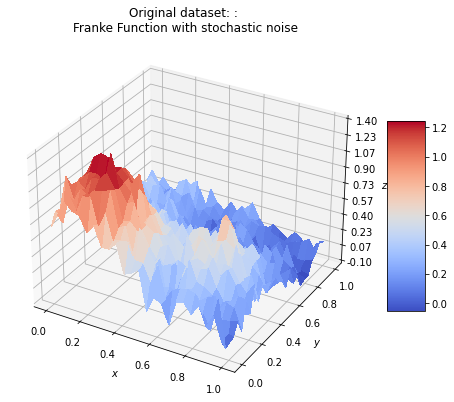

––––––––––––––––––––––––––––––––––––––––––––
Train MSE: 0.0117
Test MSE: 0.01
––––––––––––––––––––––––––––––––––––––––––––
Train R2: 0.8756
Test R2: 0.8907
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,0.000,0.000,0.000
1,7.372,7.375,7.377
2,3.816,3.819,3.822
3,-33.186,-33.173,-33.160
4,-14.771,-14.760,-14.750
5,-11.205,-11.191,-11.177
6,47.022,47.052,47.082
7,47.488,47.509,47.531
8,17.019,17.041,17.063
9,2.445,2.476,2.508


––––––––––––––––––––––––––––––––––––––––––––


In [1]:
%run ../1project/task1.py

### Comments

The $MSE$ is very close to 0 and $R^2$ tends to 1 for both training and testing datasets. This shows a very good behaviour of our model, as a fit of a fifth order polynomial.

The confidence interval of $\beta$ shows that for each estimator the range is very small, meaning that the variance is not high and the model is performing well, and not overfitting to the train data.

## Exercise 2: Bias-variance trade-off and resampling techniques

### Introduction

This exercise focuses on studying the bias-variance trade-off by implementing the *bootstrap* resampling technique.

### <font color=purple>MSE VS complexity</font>

First of all we are asked to analyse the MSE both for training and testing data as a function of complexity (i.e. degree of fitting polynomial), in order to identify the best complexity. The question is: *which is the best complexity then?*

Let's consider the following picture, taken from [Hastie et al.](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf):

<right><img src="img/MSE_complexity.png" width="500"></right>

Considering the testing MSE, we expect that it tends to 0, because we are tuning our model on the training dataset and the "difference" between the real data and our model tends to 0 when complexity increases. Considering instead the test MSE, it show a U-behaviour, getting to an increase when reaching a certain value of complexity. This means we are overfitting. Testing the model on new fresh data allows us to check if the model is "over-complex" and tends to pass through every single datapoint without considering and buffering the stochastic noise, as it should be. Here is a picture showing case of **underfitting and overfitting**:

<right><img src="img/Under_Overfitting.png" width="700"></right>

This is exactly the reason why we need to split in training and testing datasets. 

It is also possible to appreciate the regions of low/high bias and variance, it will be clearer after the Bias-Variance tradeoff analysis explanation.

So *which is the best complexity then?* The best complexity corresponds to the **minimum of the test MSE curve**.

### <font color=purple>Bootstrap and resampling techniques</font>

Resampling techniques are used to have more robust outputs from the model analysis. This means that if we want to evaluate the MSE, doing it once may not be sufficient to investigate the real bahaviour of the model. The basic idea is **resampling and reshuffling the dataset, then performing the algorithm on this "new" dataset for $b$ times, having then a probability distribution of the estimator we want to investigate** (in our case this is the optimal $\hat{\beta}$). 

This is a way to "by-pass" the fact that we have a limited dataset to realize our model, while at the same time making everything less sensible to stochastic fluctuations in this realization.

**Bootstrap algorithm**:

Given a domain $D=[x_1,x_2, \dots, x_n]$,
1. Draw a bootstrap sample $[x_1^*,x_2^*, \dots, x_n^*]$ randomly selecting from domain;
2. Compute $\hat{\beta}^*=g(x_1^*,x_2^*, \dots, x_n^*)$ with the proper function $g(x_j)$ (in our case is the OLS equation);
3. Repeat the previous steps b-times, yielding the set of estimators {$\hat{\beta}^*_1,\hat{\beta}^*_2,\dots,\hat{\beta}^*_b$};
4. Now it is possible to draw the histogram and can apply all the statistics we need to investigate the statistical properties of out estimator $\hat{\beta}$. 

Here is an example of the bootstrap resampling tecnique as demonstration of the *central limit theorem* ($z\rightarrow\mu$ and $\sigma_z\rightarrow\sigma/\sqrt{b}$ as datapoints $N\rightarrow\infty$).

<right><img src="img/Bootstrap.png" width="500"></right>

### <font color=purple>Bias-Variance Tradeoff Analysis</font>

The bias–variance tradeoff is a way of analyzing a learning algorithm's expected error (e.g. $MSE$) as a sum of three terms: the bias, variance, and a quantity called the *irreducible error*, which is usually the variance $\sigma^2$ of the noise $\epsilon$ distribution.

$$
MSE=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=bias^2+variance+\sigma^2.
$$

where:

$$
bias^2=\mathrm{Bias}^2(\boldsymbol{f},\boldsymbol{\tilde{y}})=\mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
variance=\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]=\mathbb{E}\left[(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
\sigma^2=\mathbb{E}\left[(\boldsymbol{\epsilon}-\mathbb{E}\left[\boldsymbol{\epsilon}\right])^2\right]=\mathbb{E}\left[\boldsymbol{\epsilon}^2\right]
$$


<font color=purple>**Prove the equation:**</font>

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$ and the mean value of $\boldsymbol{\epsilon}$ is by equal to zero. Furthermore, the function $f$ and $\boldsymbol{\tilde{y}}$ are not stochastic variables.

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

Reorganizing the espression we get
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=
\mathbb{E}\left[(\boldsymbol{f} -\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+
\mathbb{E}\left[(-(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]))^2\right]+
\mathbb{E}\left[(\boldsymbol{\epsilon})^2\right],
$$

And so the three terms of the previous expression.

<font color=purple>**Meaning of the bias and variance terms:**</font>
- **Bias**: is the error we get when assuming a model. It is the "distance" between the real function $f$ and the model $\tilde{y}$ and highlights the erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (*underfitting*).
- **Variance**: shows how much the model outputs are spread and refers to the amount by which our model would change if we estimated it using a different training data set. High variance may result from an algorithm modeling the stochastic noise in the training data (*overfitting*).

<center><img src="img/Bias_Variance.png" width="900"></center>

Our aim is then get a low bias and a low variance, that corresponds indeed with the minimum of the error (i.e. $MSE_{test}$). In the right graph, we can appreciate the dependance to complexity and the areas of the underfitting and overfitting with bias and variance decomposed. In this case the best complexity is in the range $[8,10]$.

*Note: variance and squared bias are nonnegative quantity, the expected test MSE can never lie below the*  **irreducible error** ($\sigma^2=\mathrm{Var}(\epsilon)$).

### Algorithm

Firstly, the $MSE$ is explored as function of complexity in order to get figure. 2.11 from [Hastie et al.](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). This means running the previous code in an external loop over a range of degrees of the polynomial. This is done through the following function:

- `plot_ols_complexity(x, y, z, maxdegree=20)`: compute the $MSE_{train}$ and $MSE_{test}$ of the OLS Regression as functions of complexity and plot the graph.

As concerning the second part, the Bias-Variance tradeoff analysis has been implemented with the *bootstrap* algorithm through the following functions:

- `bootstrap(X_train, X_test, z_train, z_test, n_boostraps=100, solver = "OLS", lmd = 10**(-12))`: run the bootstrap algorithm over *n_bootstrap* times and return a matrix where the columns correspond to the $z$ predictions from each bootstrap run (dimension: [*n X n_bootstrap*]). The *solver* and *lambda* value can be set according to the Regression technique chosen.
- `bias_variance_analysis(X_train, X_test, z_train, z_test, resampling="bootstrap", n_resampling = 100, solver = "OLS", lmd = 10**(-12))`: operate the bias-variance tradeoff analysis coupled with the given *resampling* method (default: bootstrap) with *n_resampling* runs and return the *error* (i.e. $MSE_{test}$), the *bias* and the *variance*. The other paramenters are set according to the regression technique chosen.
- `bias_variance_complexity(x, y, z, maxdegree=20, n_resampling = 100, test_size = 0.2, plot=True, title), solver = "OLS", lmd = 10**(-12)`): compute the *error*, the *bias* and the *variance* as functions of complexity, plot the graph (optional) and retunr the vectors of the three variables versus complexity, for further analysis. Other paramenters (i.e. *n_resampling*, *test_size*) are given to tune the analysis and explore its behaviour.

After performing the bias-variance tradeoff analysis in a range of complexity $(0,18)$, we run a loop for exploring different properties of this analysis, changing the number of datapoints ($n^2=[625,1600]$) and the portion of training and testing datapoints ($\text{test_size}=[0.2,0.33]$).

Seeing that the results are not smooth as expected, a rolling mean has been performed to buffer the fluctuation and to get the increasing or decreasing trend. A function has been written:

- `Rolling_Mean(vector, windows=3)`): use Pandas' dataframe to evaluate the rolling mean of the given vector over a given number of windows (default: 3), the "upper value" from the mean at $+\sigma$ and the "bottom value" from the mean at $-\sigma$.

This function is then called to plot nice smooth graphs.

### Results

Part 1: MSE_train and MSE_test in function of the complexity of the model (degree-order of polynomial) 



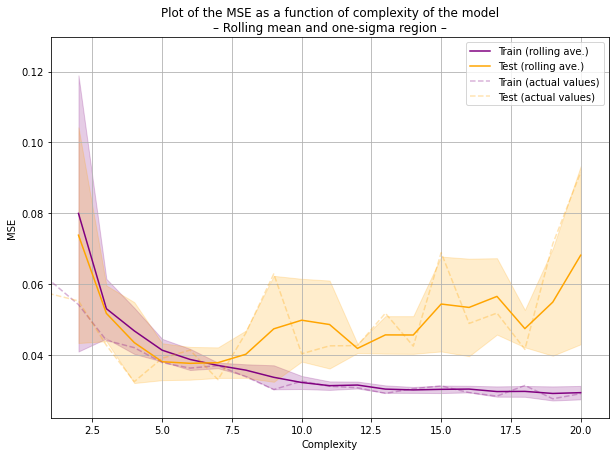

Part 2: perform a bias-variance tradeoff analysis 

Train datapoints: 500
Test datapoints: 125


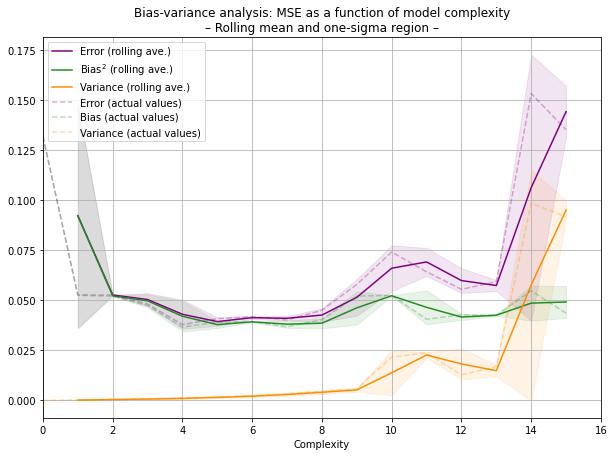

Bias-variance tradeoff analysis with variation in training and testing datapoints
0 ) Datapoints: 625 – Test size: 0.2
1 ) Datapoints: 625 – Test size: 0.33
2 ) Datapoints: 1600 – Test size: 0.2
3 ) Datapoints: 1600 – Test size: 0.33


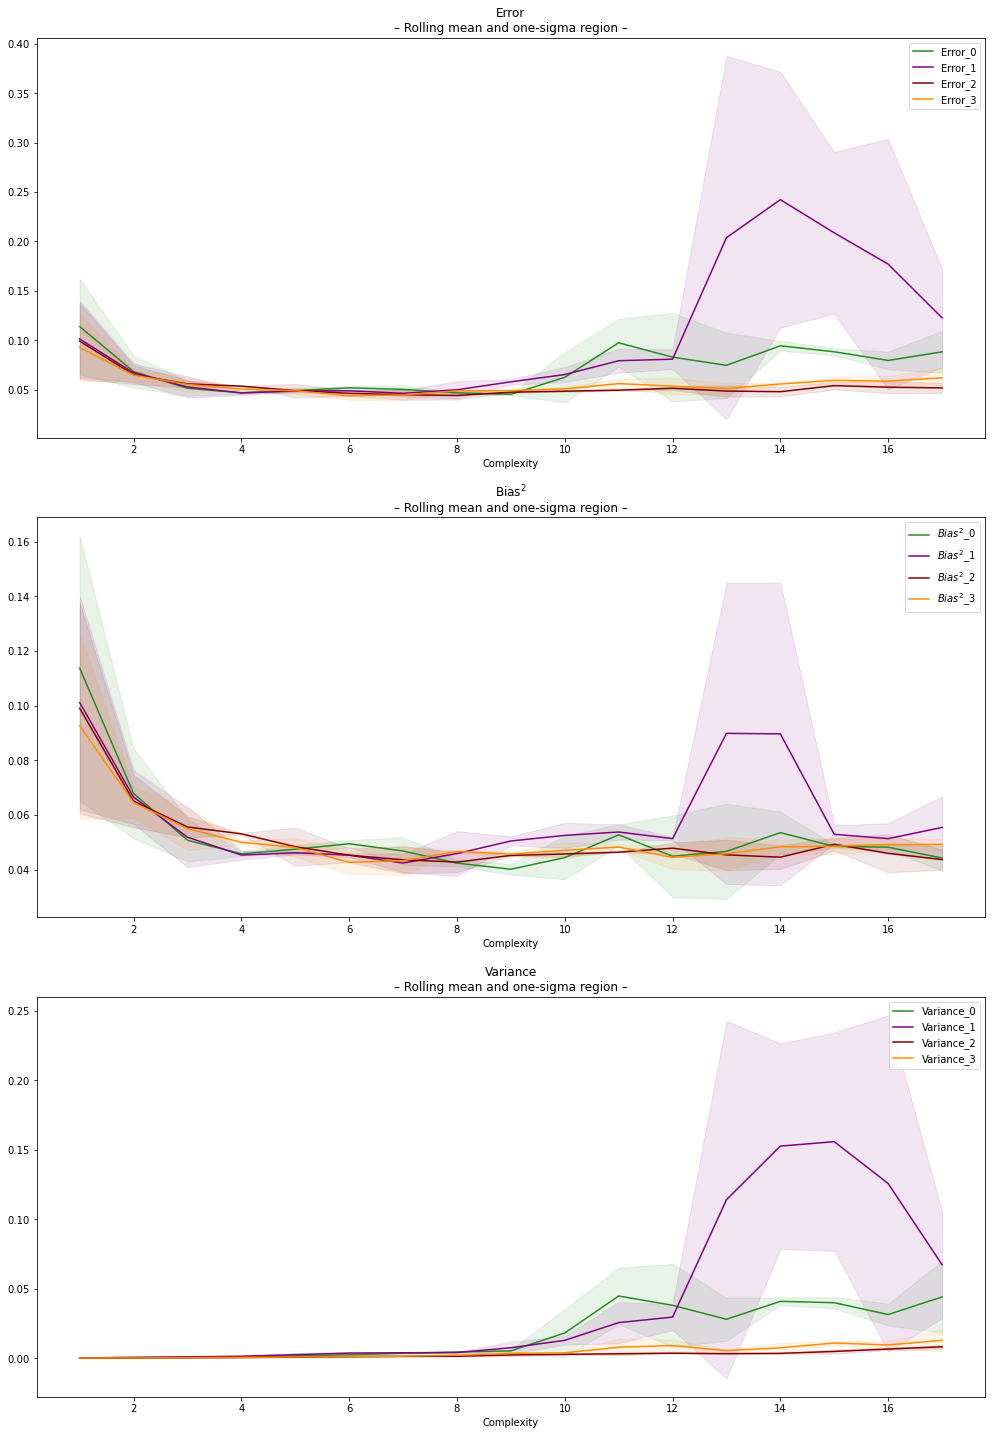

In [2]:
%run ../1project/task2.py

### Comments

<font color=purple>**MSE VS complexity**</font>

Initially the MSE for both test and train decreases as our model improves with the complexity of the polynomial. Around a polynomial of the 5th degree, we can see that the MSE for the test data increases, while the MSE for the train data continues to decrease. This is because the increased complexity causes overfitting. Our model therefore fits the training data better, but gives a poor model for the test data, because it has overfitted to the training set. It seems our model does best around a complexity of $n \in [5,7]$.


<font color=purple>**Bias-variance tradeoff analysis**</font>

The bias-variance decomposition works as expected. The error shows a U-shape: firstly the high values are due to high bias because the model is still underfitting the data and it results to have still a big difference between $z$ and $\tilde{z}$, but it has a low spreading and a variance that is close to zero. As the complexity increases, the bias decreases (better fitting the data, lower difference) and the variance increases (more spreading), and error starts raising again due to the variance contribution. We can appreciate that our goal miniminum of bias, variance and error is for a complexity in $[5,7]$.

Plots for different number of datapoints and different fraction of training and testing data show an other important behaviour: if the number of datapoints is higher, complexity needs to be increased to find the minimum in the bias-variance tradeoff, and viceversa. Since real data is often limited, in practice what we learn is that it's useful  to use a less-complex model because is less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). This summarizes the **fundamental tension** in machine learning **between the complexity of a model and the amount of training data** needed to train it.

## Exercise 3: Cross-validation as resampling techniques, adding more complexity

### Introduction
The aim is to write our own code for the $k$-fold cross-validation resampling method and explore the behaviour of the MSE as function of the complexity of the model.

### <font color=purple>Cross-validation resampling technique</font>

When the repetitive splitting of the data set is done randomly,
samples may accidently end up in a vast majority of the splits in
either training or test set. Such samples may have an unbalanced
influence on either model building or prediction evaluation. To avoid
this, $k$-fold cross-validation structures the data splitting. 

0. The samples are divided into $k$ more or less equally sized exhaustive and mutually exclusive subsets. 
1. One of these subsets plays the role of the test set while the union of the remaining subsets constitutes the training set. 
2. Evaluate the *Test Error* (e.g. $MSE$, $R^2$,...)
3. Repeat the previous two steps, being sure to consider every group as test data by the time.
4. Having now a set of $k$ *Test Error*, we now perform the mean:

$$ Error=\frac{1}{k}\sum_{i=1}^kTestError_i$$

*Note: Still the division into the $k$ subsets involves a degree of randomness. This may be fully excluded when
choosing $k=n$ (what is called leave-one-out cross-validation - LOOCV*).


### Algorithm

The code implementes our own code for the crossvalidation, through the function:

- `cross_validation(k, designmatrix, datapoints, solver="OLS",random_groupsize = False, lmd=10**(-12))`: divide the dataset into k folds of n groups and peforms cross validation.

This function uses a own written code to perfom the $k$ splitting, thanks to the functions:

- `group_indeces(n, random_groupsize = False, sections = 10)`: create index pairs, sectioning off a range of indexes into smaller groups.
- `combine_groups(index_pairs, data)`: combine the index pairs into one np.array.

The algorithm defaults to picking 80% of the groups to train, and the remaining to test. However, for random group sizes, this may not reflect on the actual percentage of datapoints. The plots presented here however, are used with even group sizes.

The best $k$ are usually in the range $[5,10]$, as it has been show that is the best compromise between accuracy and computation efficiency. Changing $k$ may affect the behaviour of MSE as function of complexity and its absolute value, but it shouldn't change which degree of complexity that corresponds to the minimum of the $MSE$ (i.e. best model). We will explore the two extremes of this range $k=5,10$.

*Note: our algorithm is made so every run will show a different result. Very interesting how it changes every time.*

### Results

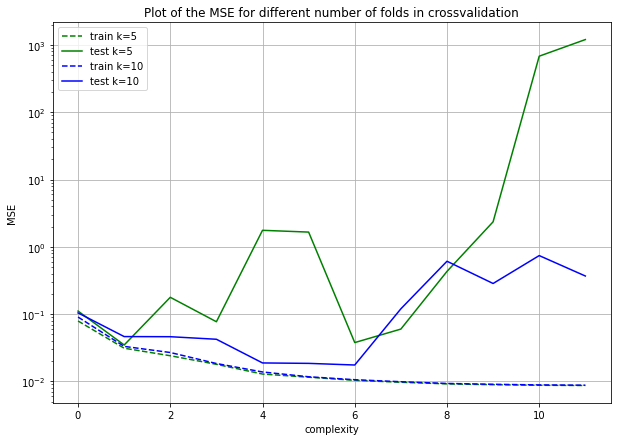

In [1]:
%run ../1project/task3.py

### Comments

Here is the typical plot for the MSE as function of complexity: starting from a value then both MSE from training and test data decreasing, while the $MSE_{train}$ keeps asyntothically to zero and $MSE_{test}$ reaches its minimum and then increases for the reasons explained earlier.

What we can appreciate comparing the previous results with the bootstrap resampling (focus on the *error* in the bias-variance tradeoff plot), both crossvalidation and bootstrap hit the same range of best complexity $[4,7]$, but the crossvalidation resampling show a steeper increase after the minimum of the $MSE$, which reaches highest values. This is also why the plot overall looks quite different (Notice that at $degree=0$ they are same order of magnitude though).

When running the code, the results changes. What we noticed is that $k=10$ keeps the minimum more stable on the previous range.

When comparing it to the k=1 case, which is the same as done in task 1 looking at the MSE, we see a higher error for crossvalidation. This is good, as it may help prevent overfitting ones data where for higher complexty the error doesn't increase fast enough for k = 1. 

## Exercise 4-5: Ridge and Lasso Regression on the Franke function with resampling

### Introduction

In task 4 and 5 we are asked to rerun all the previous results switching from the OLS Regression to the Ridge and Lasso Regression.

Since it is basically the same code we decide not to split into two different tasks, but to keep everything in one.

### <font color=purple>Ridge Regression</font>
For the Ridge Regression, the formula for the optimal $\hat{\beta}$ is the following:

$$
\hat{\beta}_{\mathrm{Ridge}} = \left(X^TX+\lambda I\right)^{-1}X^Tz,
$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{Ridge}$. Ridge regression is nothing but the standard OLS with a modified diagonal term added to $X^TX$.

### <font color=purple>Lasso Regression</font>

For the Lasso Regression, there is no nice formula as for $\hat{\beta}_{OLS}$ and $\hat{\beta}_{Ridge}$, because the cost function has an absolute value that raises problem when we derivate to find the optimal $\hat{\beta}_{Lasso}$:

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{\beta}_{Lasso}}+\lambda \mathrm{sgn}(\boldsymbol{\hat{\beta}}_{Lasso})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

where $$
\mathrm{sgn}(\boldsymbol{\beta})=\frac{d \vert \beta\vert}{d \boldsymbol{\beta}}=\left\{\begin{array}{cc} 1 & \beta > 0 \\ 0 & \beta =0\\-1 & \beta < 0, \end{array}\right.
$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{Lasso}$.


### Algorithm

First of all, we explore the behaviour of these regressions by investigating the **bias-variance tradeoff analysis with the bootstrap resampling and the MSE as function of complexity with cross-validation algorithm**. This is done by plotting, taking into count different $\lambda$s, while using the following functions:

- `ridge_reg(X_train, X_test, z_train, z_test, lmd=10**(-12))`: evaluate the Ridge equation through matix inversion for the given $\lambda$ value and return the optimal $\hat{\beta}$ values, our model *z_tilde* ($z$ values from the training data) and our prediction *z_pred* ($z$ values from the test data). 
- `lasso_reg(X_train, X_test, z_train, z_test, lmd=10**(-12))`: evaluate the Lasso equation through Scikit-Learn methods for the given $\lambda$ value  and return our model *z_tilde* ($z$ values from the training data) and our prediction *z_pred* ($z$ values from the test data). 

These are the equivalent of `OLS_solver()` method and we chose $\lambda=10^{-12}$ as default value because as $\lambda$ gets smaller, the more we can appreciate the Ridge and Lasso Regression properties. 

- `run_plot_compare(datapoints, n_resampling, N = 50, plot=False, lmd=10**(-12), k = 5, poly_degree = 10, plot_runtime=True, saveplots=False, foldername)`: compare and plot the performance of the three solvers (OLS, Ridge, Lasso) for fixed paramaters (i.e. *lambda*, *n_resampling*, *k*-folds) for both the bias-variance analysis and the cross-validation resampling. It also plot an (interesting) comparison of the different runtimes for each solver.


- `compare_lmd_BS(datapoints, N, lambdas, poly_degree, solver = 'RIDGE', n_resampling = 100, saveplots = False, foldername)`: perform and plot the bias-variance tradeoff analysis as functions of complexity, comparing the results for different *lambdas*.
- `compare_lmd_CV(datapoints, N, k, lambdas, poly_degree, solver = 'RIDGE', saveplots = False, foldername')`: perform and plot the test MSE as functions of complexity with the cross-validation resampling implemented, comparing the results for different *lambdas*.

As last step we then explore the behaviour of the **MSE of Ridge and Lasso Regressions as function of different $\lambda$s**. This is made just adding an external loop to the evaluation of the MSE for both training and testing data, varying the values of $\lambda$ each time.

*Advise for further deepenings: it is possible to couple this code with the `Rolling Mean` algorithm explained in the previous section, which has been added later on to buffer the fluctuations in the graphs and appreciate more the increasing/decreasing trend.*

### Results

Training MSE for OLS: 0.0377
Test MSE for OLS 0.0403


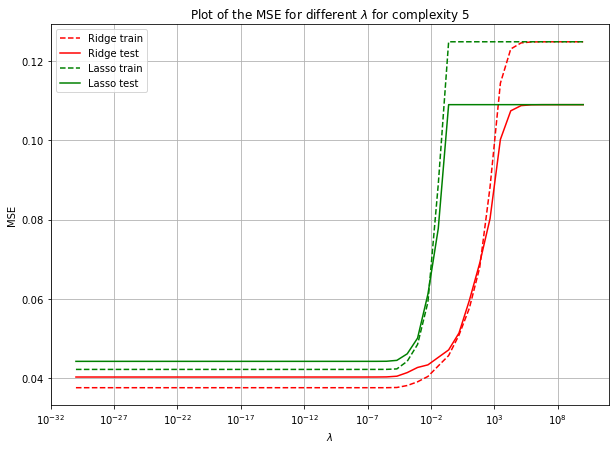

In [6]:
import warnings
warnings.filterwarnings('ignore')
%run ../1project/task45a.py

### Comments
We see here that they reach a plateau. This is understandable if we consider the simple case in which the design matrix is square and equal to the identity $X=I$, just to explicit the dependance of $\lambda$. Then we get

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\beta_i^2, \ \rightarrow \
\hat{\beta}_i^{\mathrm{Ridge}} = \frac{y_i}{1+\lambda}.
$$

Similar expression we get for the Lasso regression:

$$
\hat{\boldsymbol{\beta}}_i^{\mathrm{Lasso}} = \left\{\begin{array}{ccc}y_i-\frac{\lambda}{2} &\mathrm{if} & y_i> \frac{\lambda}{2}\\
                                                          y_i+\frac{\lambda}{2} &\mathrm{if} & y_i< -\frac{\lambda}{2}\\
							  0 &\mathrm{if} & \vert y_i\vert\le  \frac{\lambda}{2}\end{array}\right.\\.
$$

This leads to the following graph:

<center><img src="img/Ridge_Lasso.png" width="500"></center>

Now it's clear why increasing $\lambda$ leads to $\beta$-values stabilizing at $0$ and the difference in between model and real values being constant. The sharp angle of Lasso is caused by the absolute value.

Both for Ridge and Lasso regression we appreciate that if $\lambda \rightarrow 0$ gets closer and closer to the best result ($\simeq$ OLS's one).

At the end we can summarize that **OLS and Lasso give the same best result** when $\lambda$ stays below a certain value.

### Results
We perfom now an analysis of the bias-variance trade-off using the bootstrap resampling technique and an analysis of the mean squared error using cross-validation for Ridge and Lasso regression for different value of $\lambda$.

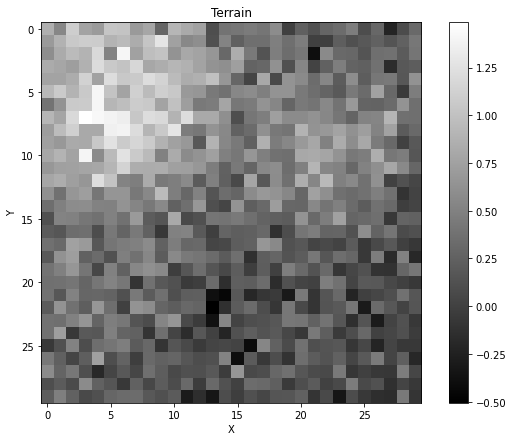

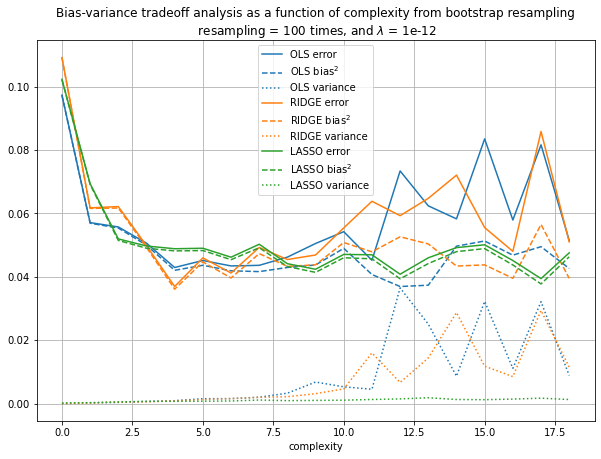

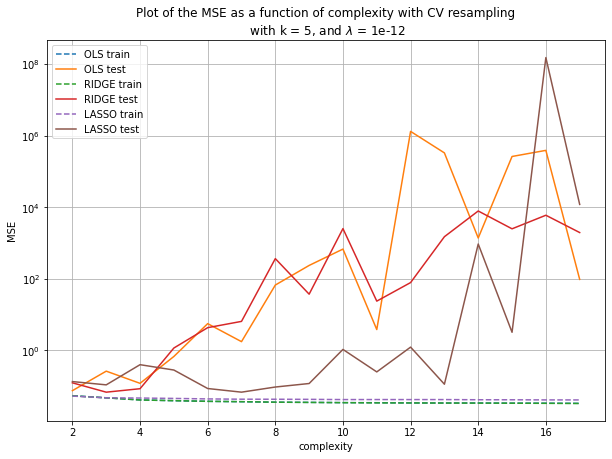

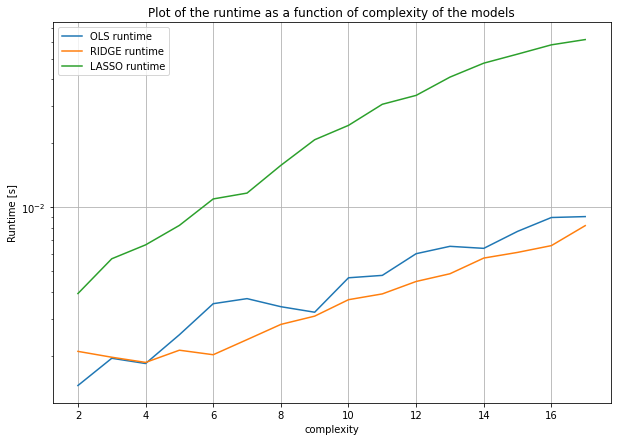

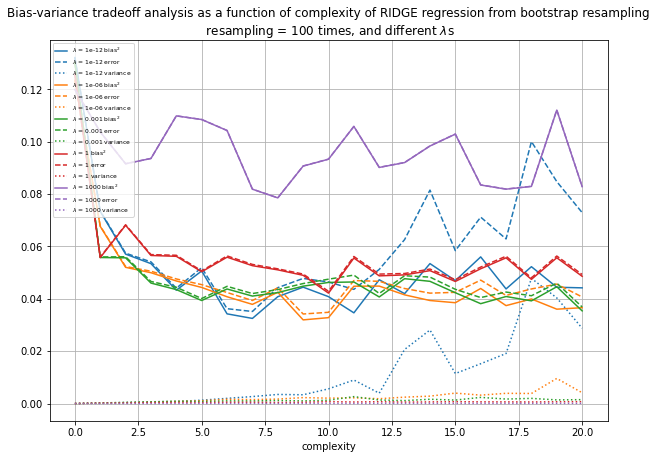

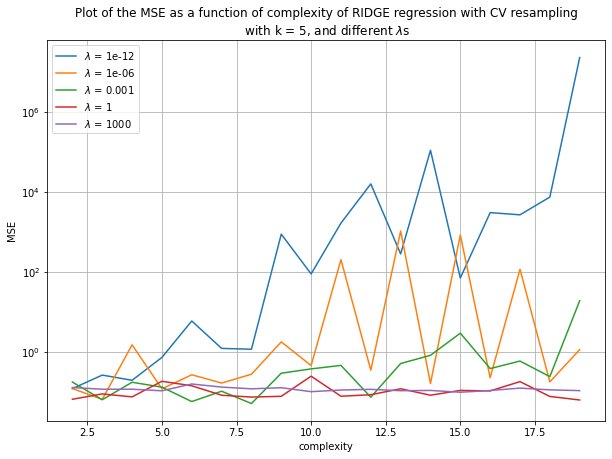

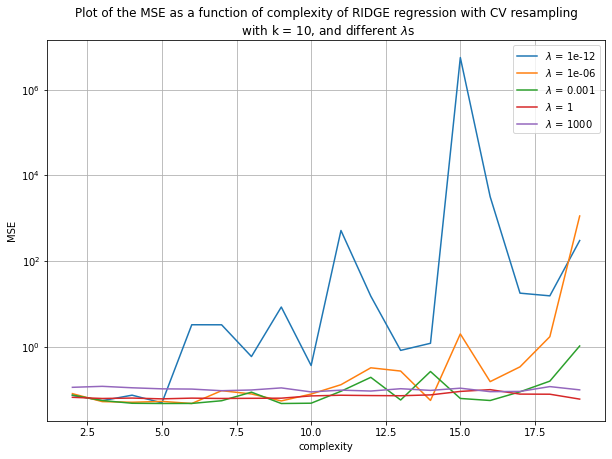

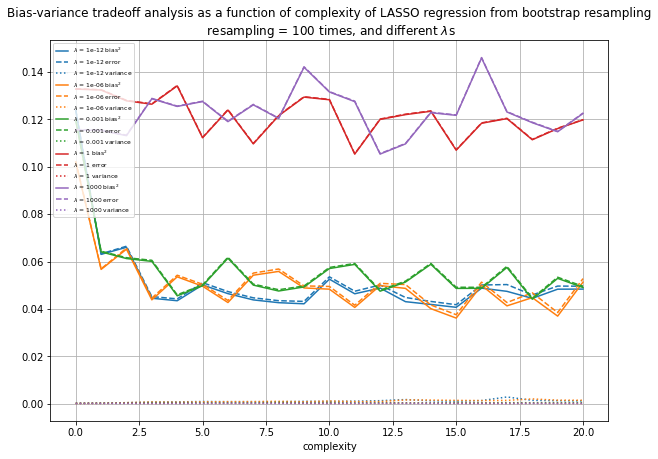

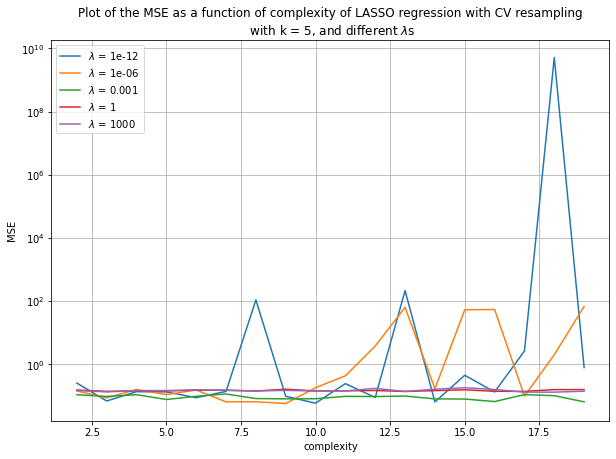

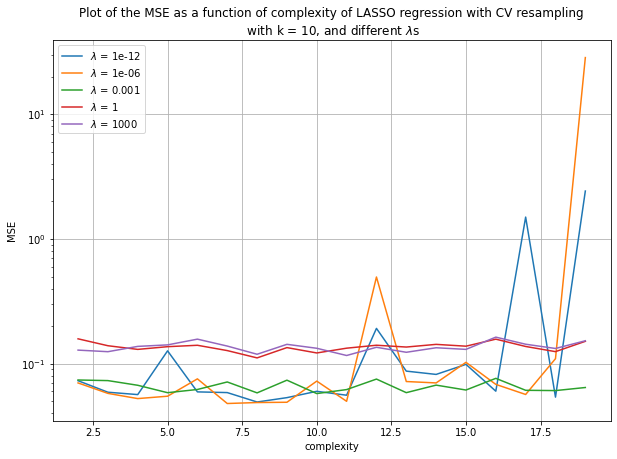

In [7]:
import warnings
warnings.filterwarnings('ignore')
%run ../1project/task45b.py

### Comments

**Comparison among OLS, Ridge, Lasso Regression**
Overall we appreciate the decomposition of the bias and variance of the three methods. While OLS and Ridge find a minimum in the range of complexity $[4,7]$, the Lasso regression suppresses the variance for even higher degree of polynomial.

What we can also notice in the plot of the runtime that OLS and Ridge slowly increase the time of computation while increasing complexity, while Lasso shows from the very beggining a highest time to compute the model. The reason may lay on the fact that the expression for evaluating $\hat{\beta}$ is more complex.

**Comparison of the bias-variance tradeoff analysis for different $\lambda$**
From these plots it's quite hard to indentify a trend because the fluctuations are quite consistent. But a few things we can notice as well. Firstly that as $\lambda \rightarrow 0$, for Ridge regression we in fact get closer results to the OLS ones, with a minimum in the range $[5,11]$. Overall what we can notice is that Ridge and Lasso Regression tend to suppress the variance as $\lambda$ increases, and over a certain value of $\lambda$ they are no more able to reach the minimum ($\beta$ suppressed to zero), as we could expect.

## Exercise 6: Analysis of real data
### Introduction

With our codes functioning and having been tested properly on a vanilla problem, we eplore now the performance on real data, i.e. digital terrain data from the website <https://earthexplorer.usgs.gov/>.

We downloaded the ones given at the [link](https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles): 

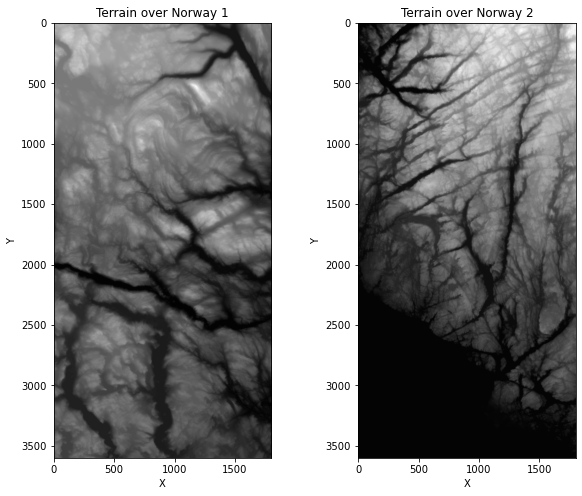

In [15]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(1,2,figsize=(10,8))

for i in range(2):
    # Load the terrain
    terrain1 = imread('Proj1_DataFiles/SRTM_data_Norway_'+str(i+1)+'.tif')
    # Show the terrain
    ax[i].set_title('Terrain over Norway '+str(i+1))
    ax[i].imshow(terrain1, cmap='gray')
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('Y')
    
plt.show()

### Results
*Note: it may take some time when re running them.*

––––––––– TASK 1 –––––––––––––––
––––––––––––––––––––––––––––––––––––––––––––
Train MSE for OLS: 0.9019
Test MSE for OLS: 0.8358
––––––––––––––––––––––––––––––––––––––––––––
Train R2 for OLS: 0.3128
Test R2 for OLS: 0.2613
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,0.000,0.000,0.000
1,13.650,13.666,13.682
2,5.392,5.407,5.423
3,-62.531,-62.452,-62.373
4,-83.260,-83.199,-83.138
5,-18.692,-18.613,-18.535
6,132.898,133.079,133.261
7,159.761,159.894,160.026
8,152.019,152.147,152.276
9,65.989,66.169,66.349


––––––––––––––––––––––––––––––––––––––––––––
––––––––– TASK 2 –––––––––––––––


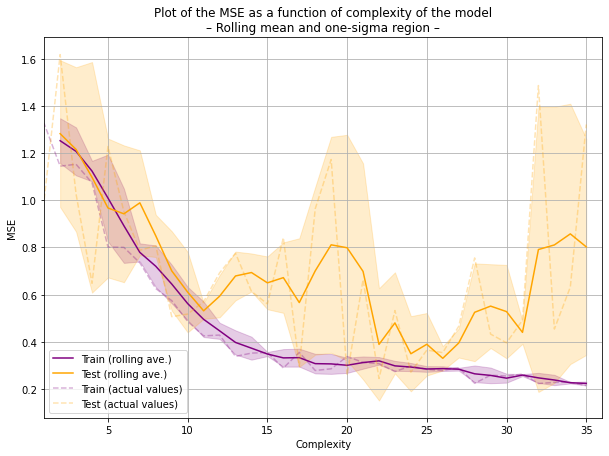

Train datapoints: 720
Test datapoints: 180


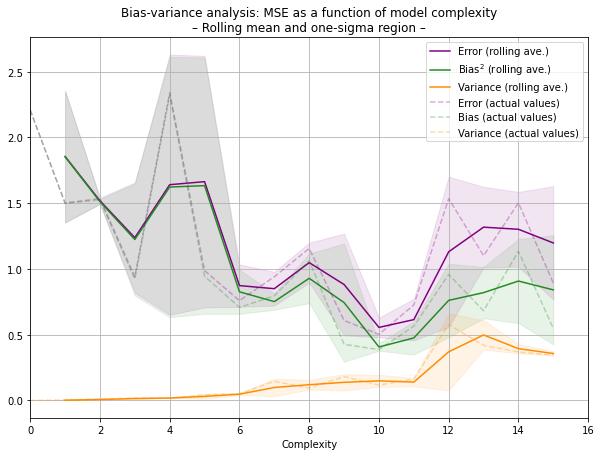

––––––––– TASK 3 –––––––––––––––


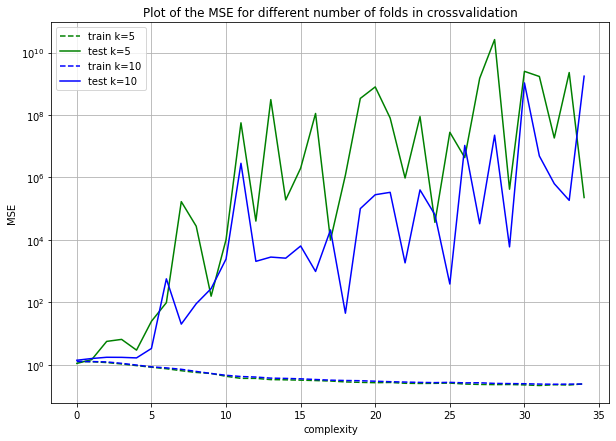

––––––––– TASK 4-5 –––––––––––––––


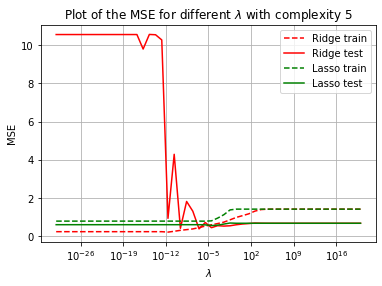

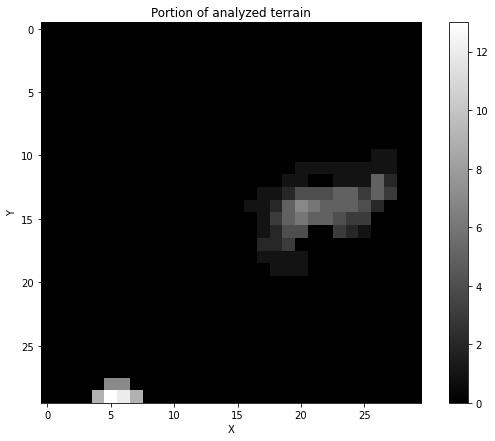

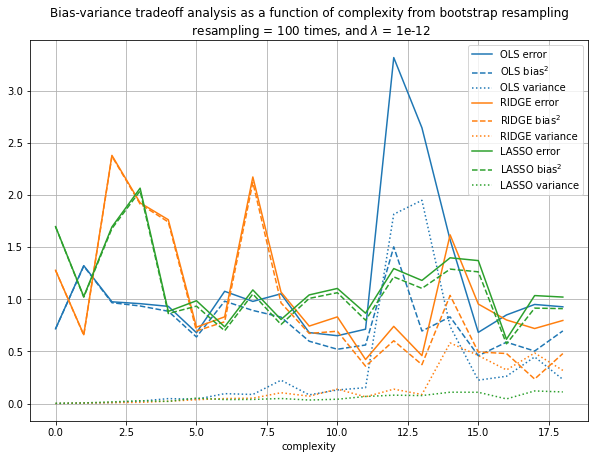

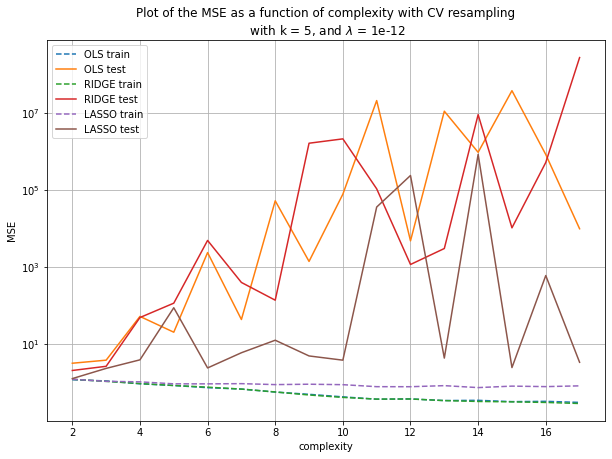

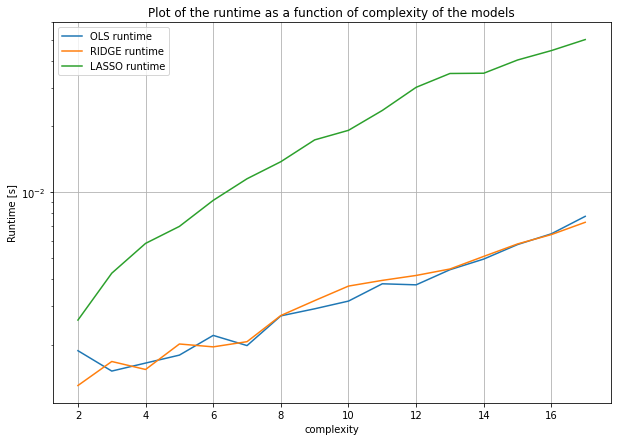

In [1]:
import warnings
warnings.filterwarnings('ignore')
%run ../1project/task6.py

### Comments

What we need to underline is that here we had the need to rescale the data, because we have now imported data with real units.

#### Overall comparison with generated data

The algorithms we have developed and the plots are reproduced, and the overall tendencis seem to be the same. One major difference though, is that we don't have the computational power (and time) to look at large portions of the real data. We used only 30 x 30 sections of the map, which may be too litlle to get enough variety in our data to effectively train the model to learn anything about more types of terrain. We could have cherry picked sections of the terrain that gave better results, or had more vriety, but that's not really something we agree with.

For the lambda values, we saw that around 1e-6 - 1e-3 gave smaller errors in the range $[1e-20, 1e10]$ for crossvalidation for ridge and lasso regression, which is similar to what we saw with the vanilla data.

For the bias variance analysis, the variance, bias and error needed greater complexity before showing the same overall shape as in the vanilla case. 

Overall the application of the algorithms on the terrain data seem to be good enough, keeping the limitations in the size of the dataset in mind.

#### A comment on runtimes
Another thing we saw, was that the runtimes were significantly greater for Lasso than for Ridge and OLS. Despite this, Ridge was most of the time as good as Lasso in terms og MSE. Thus, the tradeoff in computing time for Lasso is maybe not worth it in this case.

#### A comment on improvements for next time
We decided early on that we wanted to develop a package of functions to use, and write the report in a notebook. Unfortunately, it was quite difficult to cooperate on the notebook, as merging different versions on github proved to be almost impossible if theres a conflict. Running the code in the cells was also a little bit painful, and not as seemless as we had first imagined. 

Additionally, we did not make the code object oriented, which proved very painful as the code got larger, and passing a large amount of arguments and returns around got very messy. For next time we will for sure make the code object oriented. That being said, we did take the time to at least make a package which is somewhat organized, and not just have a bunch of loose files to import from, so it's not the absolute worst.

We are also a bit worried that the report is too detailed, or not detailed enough? We want feedback on this for next time.